In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [63]:
dataset=pd.read_csv('D:\ML\data\T1.csv')
dataset.drop('Theoretical_Power_Curve (KWh)',axis=1,inplace=True)
# features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
features_with_zeros=[features for features in dataset.columns if (dataset[features]==0).sum()>1]


In [64]:
features_with_zeros

['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)']

In [65]:
# import matplotlib.pyplot as plt
# for feature in features_with_zeros:
#     data = dataset.copy()
    
#     # let's make a variable that indicates 1 if the observation was missing or zero otherwise
#     data[feature] = np.where((data[feature]==0), 1, 0)
    
#     # let's calculate the mean SalePrice where the information is missing or present
#     data.groupby(feature)['LV ActivePower (kW)'].median().plot.bar()
#     plt.title(feature)
#     plt.show()

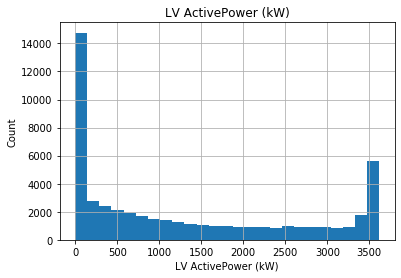

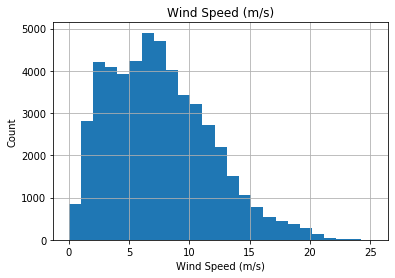

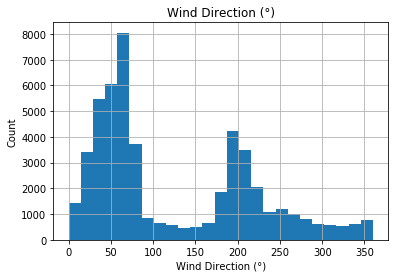

In [66]:
continuous_feature=['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)']
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 4 columns):
Date/Time              50530 non-null object
LV ActivePower (kW)    50530 non-null float64
Wind Speed (m/s)       50530 non-null float64
Wind Direction (°)     50530 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [68]:

# data['LV ActivePower (kW)'].replace(['',0],inplace=True)
# for feature in continuous_feature:
#     data[feature]=np.log(data[feature])
#     data['LV ActivePower (kW)']=np.log(data['LV ActivePower (kW)'])
#     plt.scatter(data[feature],data['LV ActivePower (kW)'])
#     plt.xlabel(feature)
#     plt.ylabel('LV ActivePower (kW)')
#     plt.title(feature)
#     plt.show()

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 4 columns):
Date/Time              50530 non-null object
LV ActivePower (kW)    50530 non-null float64
Wind Speed (m/s)       50530 non-null float64
Wind Direction (°)     50530 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [70]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[['Wind Speed (m/s)','Wind Direction (°)']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [76]:
# data.drop('Date/Time',axis=1,inplace=True)
data

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
0,380.047791,5.311336,259.994904
1,453.769196,5.672167,268.641113
2,306.376587,5.216037,272.564789
3,419.645905,5.659674,271.258087
4,380.650696,5.577941,265.674286
5,402.391998,5.604052,264.578613
6,447.605713,5.793008,266.163605
7,387.242188,5.306050,257.949493
8,463.651215,5.584629,253.480698
9,439.725708,5.523228,258.723785


In [81]:
scaler.transform(data[['Wind Speed (m/s)',
                       'Wind Direction (°)']])


array([[0.21071704, 0.7222129 ],
       [0.22503231, 0.74623031],
       [0.20693623, 0.75712948],
       ...,
       [0.33465661, 0.23539741],
       [0.37377457, 0.23416244],
       [0.3959108 , 0.22854214]])

In [82]:
data=pd.concat([data['LV ActivePower (kW)'],pd.DataFrame(
    scaler.transform(data[['Wind Speed (m/s)','Wind Direction (°)']]),columns=['Wind Speed (m/s)','Wind Direction (°)'])],axis=1)

In [84]:
data.to_csv('wind.csv',index=False)